
Epoch 1
 Input: [10  2 -1], Target: [ 1 -1 -1], Output: [0.0 0.0 0.0], Error: [ 1.0 -1.0 -1.0], Updated Weights:
[[ 0.1  0.0 -0.0]
 [-0.1 -0.0  0.0]
 [-0.1 -0.0  0.0]]
 Input: [ 2 -5 -1], Target: [-1  1 -1], Output: [ 0.1 -0.1 -0.1], Error: [-1.1  1.1 -0.9], Updated Weights:
[[ 0.1  0.1  0.0]
 [-0.1 -0.1 -0.0]
 [-0.1  0.0  0.0]]
 Input: [-5  5 -1], Target: [-1 -1 -1], Output: [-0.0  0.0  0.7], Error: [-1.0 -1.0 -1.7], Updated Weights:
[[ 0.1  0.0  0.0]
 [-0.0 -0.1  0.0]
 [-0.0 -0.1  0.0]]

Epoch 2
 Input: [10  2 -1], Target: [ 1 -1 -1], Output: [ 1.3 -0.5 -0.5], Error: [-0.3 -0.5 -0.5], Updated Weights:
[[ 0.1  0.0  0.0]
 [-0.1 -0.1  0.0]
 [-0.1 -0.1  0.0]]
 Input: [ 2 -5 -1], Target: [-1  1 -1], Output: [0.1 0.5 0.1], Error: [-1.1  0.5 -1.1], Updated Weights:
[[ 0.1  0.1  0.0]
 [-0.1 -0.2  0.0]
 [-0.1 -0.0  0.1]]
 Input: [-5  5 -1], Target: [-1 -1 -1], Output: [-0.0 -0.5  0.4], Error: [-1.0 -0.5 -1.4], Updated Weights:
[[ 0.1  0.0  0.0]
 [-0.0 -0.2  0.0]
 [-0.0 -0.1  0.1]]

Epoch 3
 

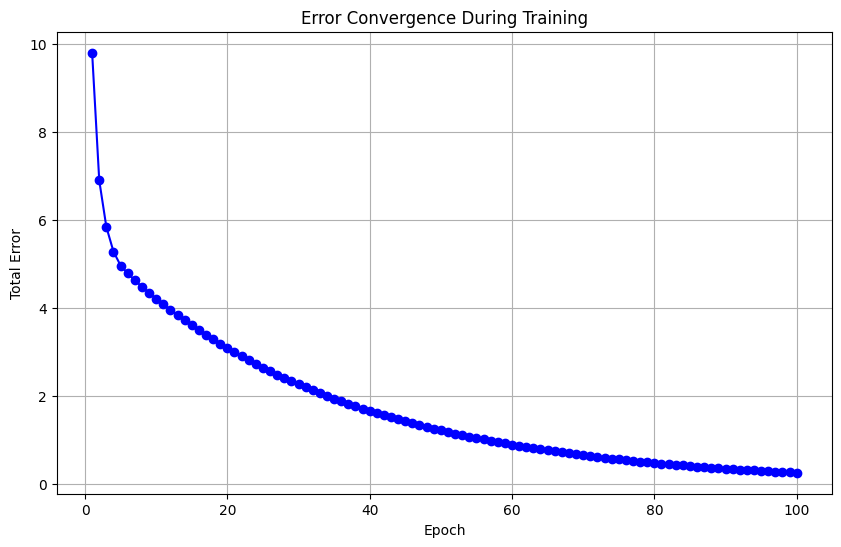

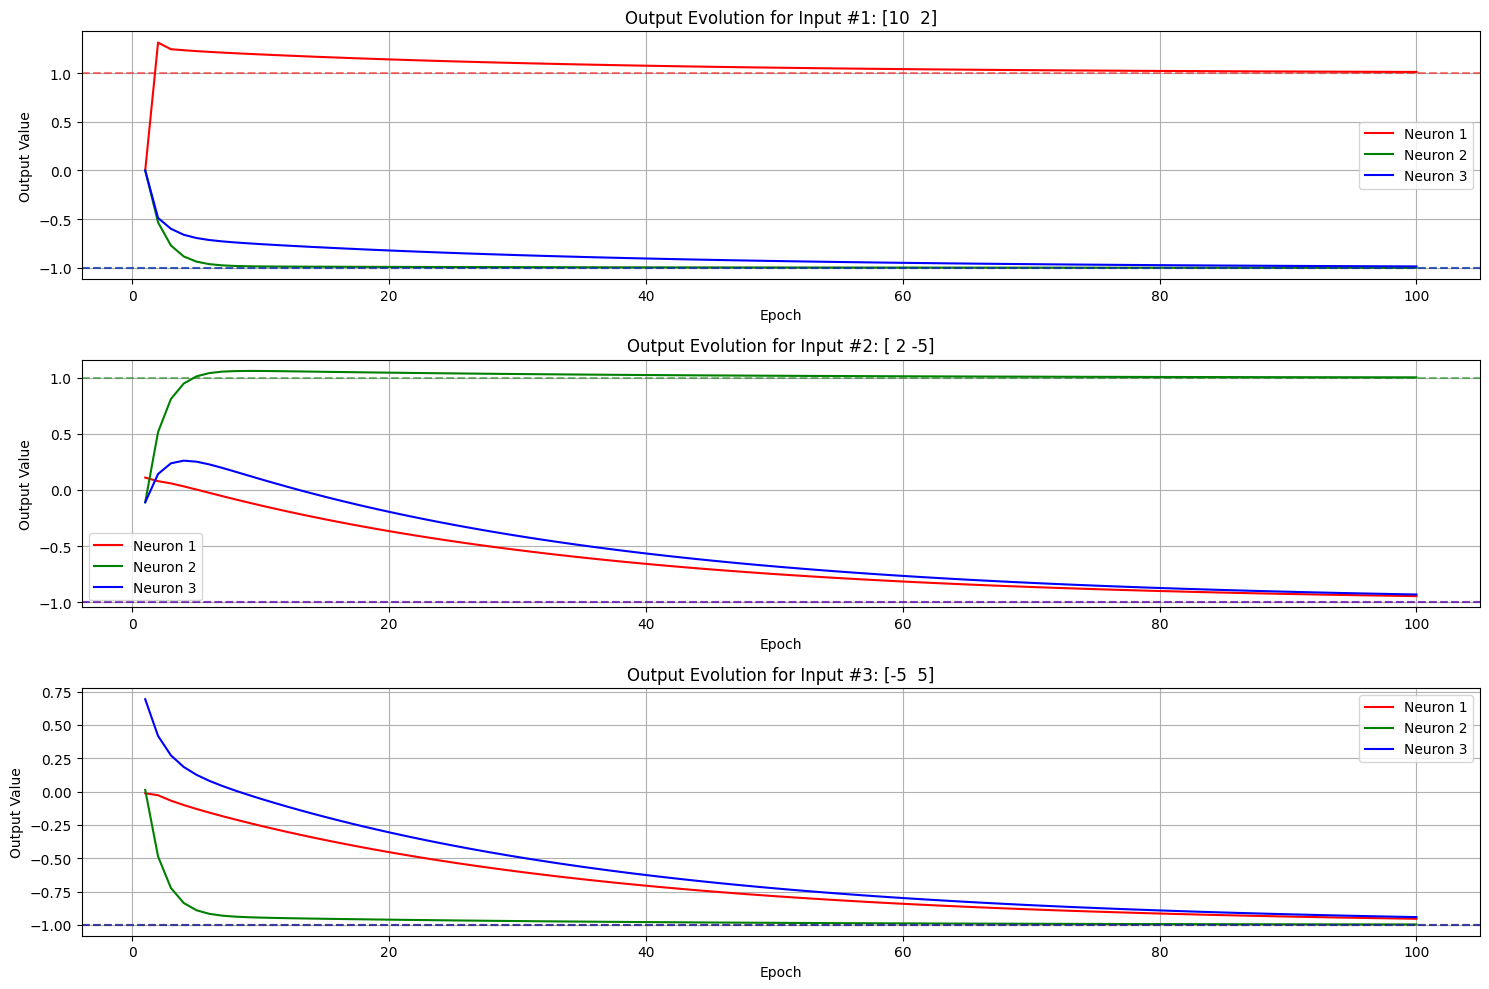

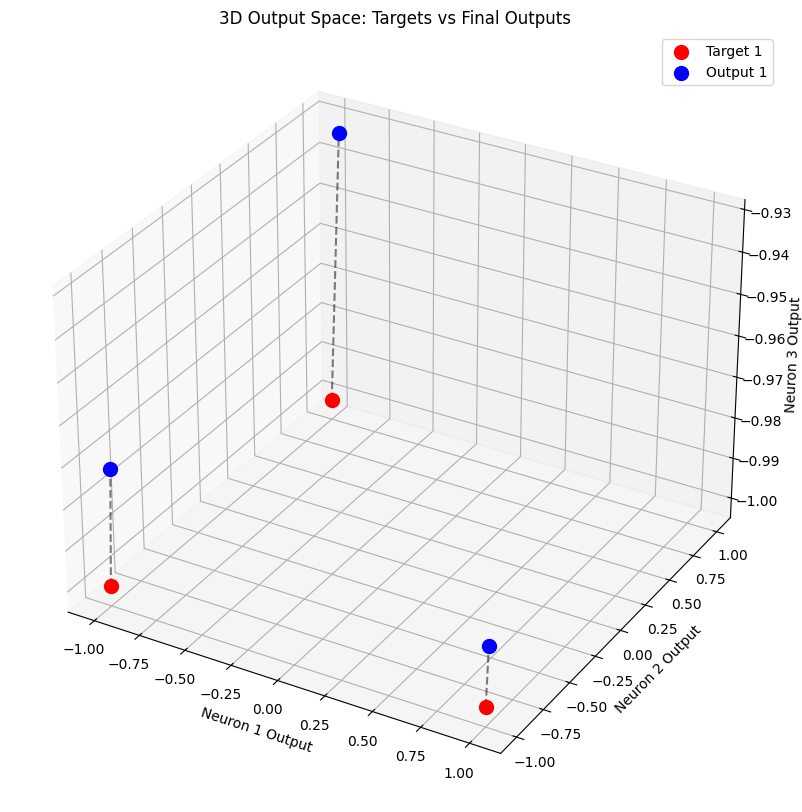


All essential visualizations have been generated!


''

In [1]:
# Case2: Single layer NN with continuous neuron
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Format floats with 1 decimal, and show trailing zeros (0.0) 设置浮点数输出格式
np.set_printoptions(precision=1, floatmode='fixed')

# input patterns: x1, x2, bias
inputs = np.array([
    [10,  2, -1],
    [ 2, -5, -1],
    [-5,  5, -1]
])

# teacher signal (3d output for each sample)
# each output is for a different neuron 对应于三个输出神经元
targets = np.array([
    [ 1, -1, -1],
    [-1,  1, -1],
    [-1, -1, -1]
])

# initialize weights (3 neurons x 3 inputs) 3个输出神经元 x 3个输入（含bias）
weights = np.zeros((3, 3))
# learning rate
learning_rate = 0.01
# max epochs to prevent infinite loop
max_epochs = 100

# For visualization purposes
error_history = []
weight_history = [weights.copy()]
output_history = []

# start training
for epoch in range(max_epochs):
    total_error = 0
    epoch_outputs = []
    print(f"\nEpoch {epoch + 1}")

    # loop over all input samples
    for i in range(len(inputs)):
        x = inputs[i]       # current input vector
        t = targets[i]      # corresponding target vector
        # compute output (no activation) 连续神经元无激活函数
        y = np.dot(weights, x)
        epoch_outputs.append(y.copy())
        # error = target - output
        error = t - y
        # update weights for all 3 neurons
        for j in range(3):      # for each neuron output
            weights[j] += learning_rate * error[j] * x
        # accumulate total error
        total_error += np.sum(np.abs(error))
        # print details
        print(f" Input: {x}, Target: {t}, Output: {y}, Error: {error}, Updated Weights:\n{weights}")
    
    # Store history for visualization
    error_history.append(total_error)
    weight_history.append(weights.copy())
    output_history.append(epoch_outputs)
    
    # stop if all outputs are correct
    if total_error < 0.1:  # Using a small threshold for continuous network
        print("\nTraining converged.")
        break
else:
    print("\nReached max epochs. Training may not have converged.")

# Final weights after training
print("\nFinal weight matrix:")
print(weights)

# Test network on all input patterns
print("\nFinal network output for each input:")
for x in inputs:
    output = np.dot(weights, x)
    print(f" Input: {x}, Output: {output}")

# Visualization Functions

# 1. Error Convergence Plot - Most essential for seeing training progress
def plot_error_convergence():
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(error_history) + 1), error_history, 'b-o')
    plt.title('Error Convergence During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Total Error')
    plt.grid(True)
    plt.savefig('continuous_network_error.png')
    plt.show()

# 2. Output Evolution - Shows how outputs approach targets over time
def plot_output_evolution():
    plt.figure(figsize=(15, 10))
    
    # Create subplots for each training sample
    for i in range(len(inputs)):
        plt.subplot(len(inputs), 1, i+1)
        
        # Extract outputs for this sample across epochs
        neuron1_outputs = [epoch_out[i][0] for epoch_out in output_history]
        neuron2_outputs = [epoch_out[i][1] for epoch_out in output_history]
        neuron3_outputs = [epoch_out[i][2] for epoch_out in output_history]
        
        epochs = range(1, len(output_history) + 1)
        
        # Plot evolution for each neuron
        plt.plot(epochs, neuron1_outputs, 'r-', label='Neuron 1')
        plt.plot(epochs, neuron2_outputs, 'g-', label='Neuron 2')
        plt.plot(epochs, neuron3_outputs, 'b-', label='Neuron 3')
        
        # Plot target lines
        plt.axhline(y=targets[i][0], color='r', linestyle='--', alpha=0.5)
        plt.axhline(y=targets[i][1], color='g', linestyle='--', alpha=0.5)
        plt.axhline(y=targets[i][2], color='b', linestyle='--', alpha=0.5)
        
        plt.title(f'Output Evolution for Input #{i+1}: {inputs[i][:2]}')
        plt.xlabel('Epoch')
        plt.ylabel('Output Value')
        plt.grid(True)
        plt.legend()
    
    plt.tight_layout()
    plt.savefig('continuous_network_output_evolution.png')
    plt.show()

# 3. 3D Decision Space Visualization - Helpful for understanding how inputs map to outputs
def plot_3d_decision_space():
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the training points in 3D output space
    for i, (x, t) in enumerate(zip(inputs, targets)):
        ax.scatter(t[0], t[1], t[2], c='r', s=100, label=f'Target {i+1}' if i == 0 else "")
        
        # Final outputs
        y = np.dot(weights, x)
        ax.scatter(y[0], y[1], y[2], c='b', s=100, label=f'Output {i+1}' if i == 0 else "")
        
        # Connect target and output with a line
        ax.plot([t[0], y[0]], [t[1], y[1]], [t[2], y[2]], 'k--', alpha=0.5)
    
    ax.set_xlabel('Neuron 1 Output')
    ax.set_ylabel('Neuron 2 Output')
    ax.set_zlabel('Neuron 3 Output')
    ax.set_title('3D Output Space: Targets vs Final Outputs')
    ax.legend()
    plt.savefig('continuous_network_3d_output.png')
    plt.show()

# Generate only the most essential visualizations
print("\nGenerating essential visualizations...")
plot_error_convergence()
plot_output_evolution()
plot_3d_decision_space()

print("\nAll essential visualizations have been generated!")

input("\nPress ENTER to exit...")